In [1]:
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceMatrix, DistanceTreeConstructor
from iterpop import iterpop as ip
from keyname import keyname as kn
from matplotlib import colors as mpl_colors
from teeplot import teeplot as tp

import Bio
import csv
import glob
import itertools
import json
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import networkx as nx
import numpy as np
import pandas as pd
import scipy as sci
import seaborn as sns
import urllib.request as request

from pathlib import Path

import json

from etlib.PlotTools.PlotTools import enable_pretty_graphing
enable_pretty_graphing()

# get data

In [2]:
filenames = glob.glob("dump/stint=*/*/a=genome+criteria=abundance+*thread=0*.json")

In [3]:
threads = []

for thread in range(0, 4):
    stint_tags = {}

    for filename in glob.glob(f"dump/stint=*/*/a=genome+criteria=abundance+*thread={thread}*.json"):
        file_data = kn.unpack(filename)
        with open(filename, 'r') as file:
            data = json.load(file)
            data = data['value0']['event_tags']['tags']
            tags = [v['value0']['value0'] for k, v in data.items()]
#             print(file_data['stint'])
#             print(tags)
            stint_tags[file_data['stint']] = tags
    stint_tags = {int(k): v for k, v in stint_tags.items()}
    stint_tags = dict(sorted(stint_tags.items()))
    del stint_tags[101]
    del stint_tags[102]
    threads.append(stint_tags)


In [4]:
# todo: store this as a tar gz and upload it to osf !!!!!
# then decompress inside temp directory
# also push all data and graphs to github

# preprocess data

In [5]:
stint_tags = {}
tag_nums = set()  # for logging
for filename in filenames:
    file_data = kn.unpack(filename)
    with open(filename, 'r') as file:
        data = json.load(file)
        data = data['value0']['event_tags']['tags']
        tags = [v['value0']['value0'] for k, v in data.items()]
        tag_nums.add(len(tags))
        stint_tags[file_data['stint']] = tags
stint_tags = {int(k): v for k, v in stint_tags.items()}
stint_tags = dict(sorted(stint_tags.items()))
del stint_tags[101]
del stint_tags[102]

print("num tags", ip.popsingleton(tag_nums))


num tags 35


# generate distance matrix

## we're using hamming distance

In [6]:
def hamming_distance(a, b):
    return (a ^ b).bit_count()

## calculate all pairwise distances and store them in the matrix

In [7]:
matrices = []
for stint_tags in threads:
    matrix = np.zeros((len(stint_tags), len(stint_tags)))
    pairwise = itertools.combinations(list(stint_tags.keys()), 2)

    for a, b in pairwise:
        matrix[a][b] = sum(hamming_distance(x, y) for x, y in zip(stint_tags[a], stint_tags[b]))
    matrices.append(matrix)

# store data for later use

In [11]:
# make dir if it doesn't already exist
Path("data/").mkdir(exist_ok=True)
# save distance matrix as json
np.savetxt("data/distance_matrix.matrix", matrices[0]) # store as txt with save_txt
# save stint tags
with open("data/stint_tags.json", 'w') as f:
    f.write(json.dumps(threads[0], sort_keys=True))

In [9]:
matrix

array([[   0.,   97., 1122., ..., 1113., 1123., 1112.],
       [   0.,    0., 1119., ..., 1104., 1114., 1103.],
       [   0.,    0.,    0., ...,  449.,  441.,  442.],
       ...,
       [   0.,    0.,    0., ...,    0.,   46.,   57.],
       [   0.,    0.,    0., ...,    0.,    0.,   59.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

In [7]:
len(stint_tags[2])

35

In [7]:
matrices[0]

array([[   0.,  150., 1116., ..., 1110., 1106., 1108.],
       [   0.,    0., 1124., ..., 1104., 1100., 1104.],
       [   0.,    0.,    0., ...,  488.,  490.,  488.],
       ...,
       [   0.,    0.,    0., ...,    0.,   12.,   10.],
       [   0.,    0.,    0., ...,    0.,    0.,   10.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

In [8]:
matrices[1]

array([[   0.,  102., 1114., ..., 1109., 1110., 1112.],
       [   0.,    0., 1114., ..., 1097., 1100., 1102.],
       [   0.,    0.,    0., ...,  481.,  474.,  478.],
       ...,
       [   0.,    0.,    0., ...,    0.,   43.,   45.],
       [   0.,    0.,    0., ...,    0.,    0.,    6.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

teeplots/distance_matrix/cmap=blues+linecolor=88888820+viz=heatmap+ext=.pdf
teeplots/distance_matrix/cmap=blues+linecolor=88888820+viz=heatmap+ext=.png


<AxesSubplot:>

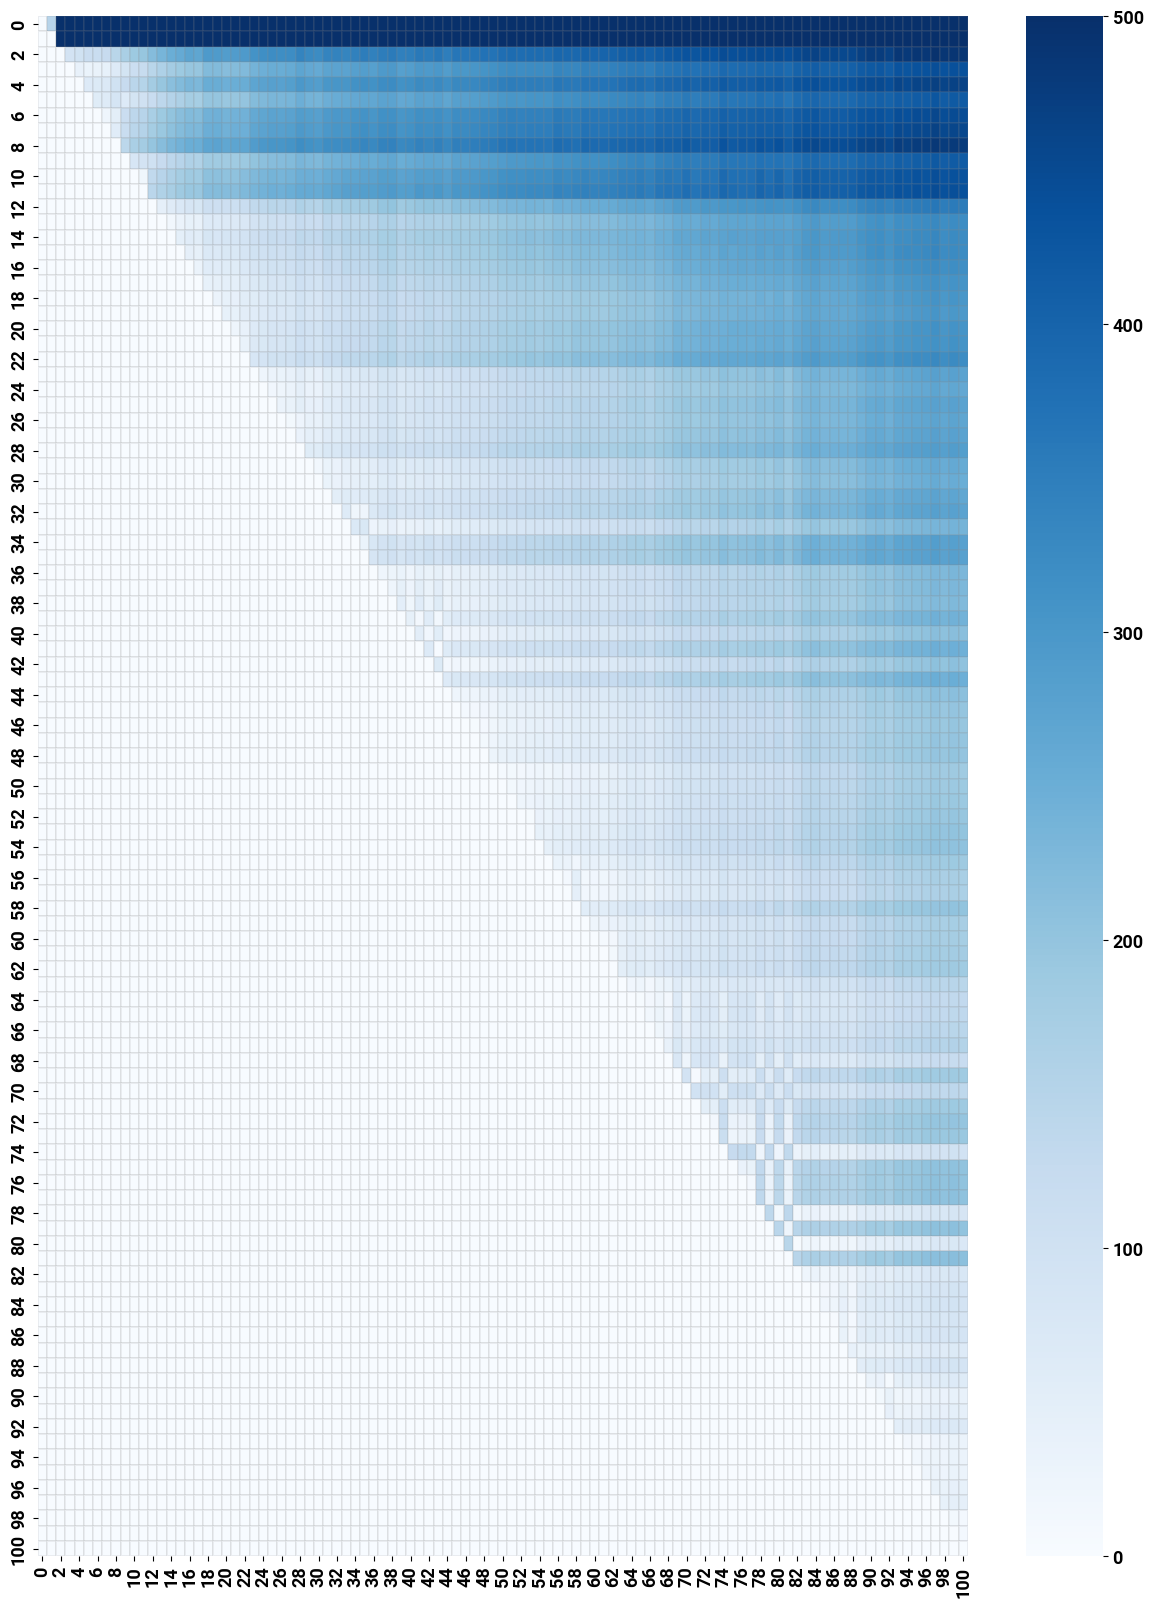

In [9]:
tp.tee(
    sns.heatmap,
    matrices[0],
    vmax=500,
    linewidths=0.05,
    linecolor='#88888820',
    cmap='Blues',
    teeplot_subdir="distance_matrix"
)

teeplots/distance_matrix/cmap=blues+linecolor=88888820+viz=heatmap+ext=.pdf
teeplots/distance_matrix/cmap=blues+linecolor=88888820+viz=heatmap+ext=.png


<AxesSubplot:>

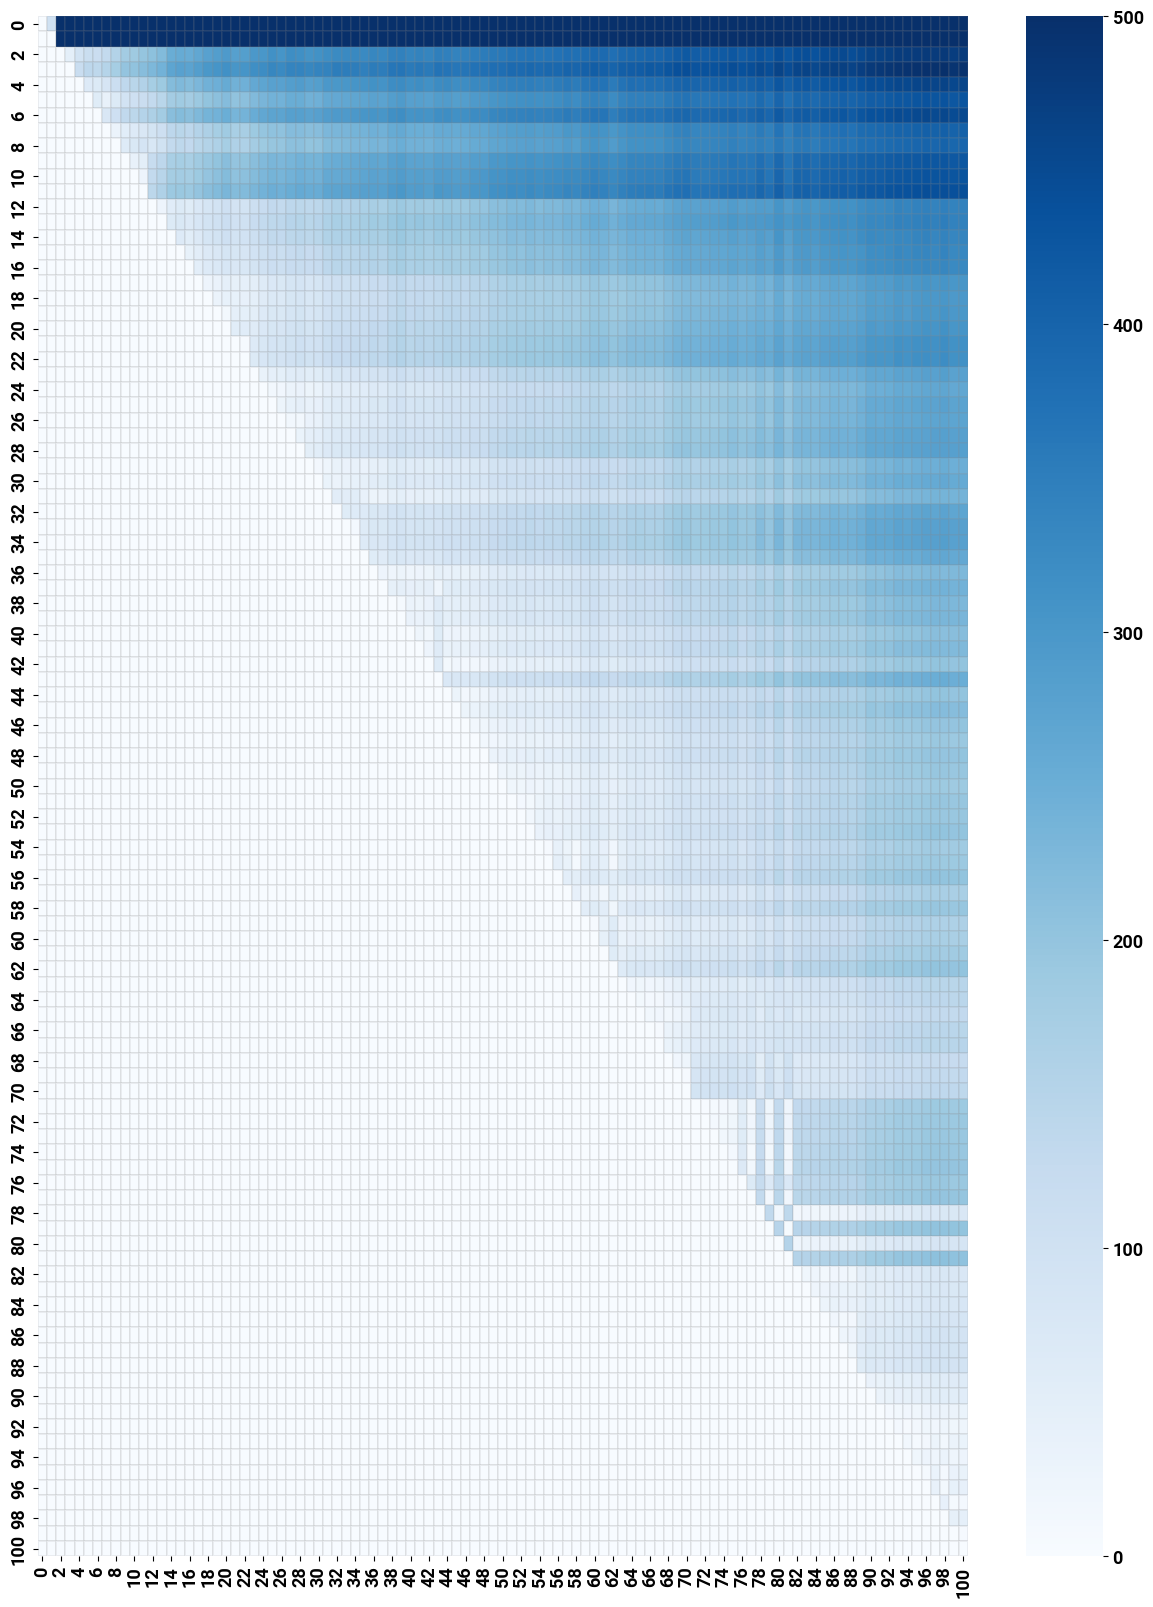

In [10]:
tp.tee(
    sns.heatmap,
    matrices[1],
    vmax=500,
    linewidths=0.05,
    linecolor='#88888820',
    cmap='Blues',
    teeplot_subdir="distance_matrix"
)